In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# train test split
from sklearn.model_selection import train_test_split
# regression model
from sklearn.linear_model import LinearRegression
# regression analysis
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# Data Cleaning

In [17]:
wage_data = pd.read_csv('data/filtered.csv')
wage_data

,SEX,AGE,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,2,85,8,2,7,0,3,0,0,0,0,0
1,1,51,1,2,6,0,3,12500,0,0,0,0
2,2,36,2,2,2,0,3,16400,0,0,0,0
3,1,74,2,2,0,0,3,0,0,0,0,0
4,1,49,1,1,7,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2809385,1,55,1,2,6,0,1,21800,0,0,56,13
2809386,1,33,1,2,10,11,1,52000,0,0,56,10
2809387,2,27,1,2,10,23,1,43000,0,0,56,45
2809388,1,66,1,2,6,0,1,162000,0,0,56,10


#### Data Code

##### Race Codes: 

1	White	
2	Black/African American	
3	American Indian or Alaska Native	
4	Chinese	
5	Japanese	
6	Other Asian or Pacific Islander	
7	Other race, nec	
8	Two major races	
9	Three or more major races

##### HCOVANY Codes: 

1	No health insurance coverage	
2	With health insurance coverage

##### EDUC codes:

00	N/A or no schooling	X
01	Nursery school to grade 4	X
02	Grade 5, 6, 7, or 8	X
03	Grade 9	X
04	Grade 10	X
05	Grade 11	X
06	Grade 12	X
07	1 year of college	X
08	2 years of college	X
09	3 years of college	·
10	4 years of college	X
11	5+ years of college	X
99	Missing


##### DEGFIELD Codes: 

00	N/A	X
11	Agriculture	X
13	Environment and Natural Resources	X
14	Architecture	X
15	Area, Ethnic, and Civilization Studies	X
19	Communications	X
20	Communication Technologies	X
21	Computer and Information Sciences	X
22	Cosmetology Services and Culinary Arts	X
23	Education Administration and Teaching	X
24	Engineering	X
25	Engineering Technologies	X
26	Linguistics and Foreign Languages	X
29	Family and Consumer Sciences	X
32	Law	X
33	English Language, Literature, and Composition	X
34	Liberal Arts and Humanities	X
35	Library Science	X
36	Biology and Life Sciences	X
37	Mathematics and Statistics	X
38	Military Technologies	X
40	Interdisciplinary and Multi-Disciplinary Studies (General)	X
41	Physical Fitness, Parks, Recreation, and Leisure	X
48	Philosophy and Religious Studies	X
49	Theology and Religious Vocations	X
50	Physical Sciences	X
51	Nuclear, Industrial Radiology, and Biological Technologies	X
52	Psychology	X
53	Criminal Justice and Fire Protection	X
54	Public Affairs, Policy, and Social Work	X
55	Social Sciences	X
56	Construction Services	X
57	Electrical and Mechanic Repairs and Technologies	X
58	Precision Production and Industrial Arts	·
59	Transportation Sciences and Technologies	X
60	Fine Arts	X
61	Medical and Health Sciences and Services	X
62	Business	X
64	History


##### PWSTATE2:

00	N/A	X
01	Alabama	X
02	Alaska	X
04	Arizona	X
05	Arkansas	X
06	California	X
08	Colorado	X
09	Connecticut	X
10	Delaware	X
11	District of Columbia	X
12	Florida	X
13	Georgia	X
15	Hawaii	X
16	Idaho	X
17	Illinois	X
18	Indiana	X
19	Iowa	X
20	Kansas	X
21	Kentucky	X
22	Louisiana	X
23	Maine	X
24	Maryland	X
25	Massachusetts	X
26	Michigan	X
27	Minnesota	X
28	Mississippi	X
29	Missouri	X
30	Montana	X
31	Nebraska	X
32	Nevada	X
33	New Hampshire	X
34	New Jersey	X
35	New Mexico	X
36	New York	X
37	North Carolina	X
38	North Dakota	X
39	Ohio	X
40	Oklahoma	X
41	Oregon	X
42	Pennsylvania	X
44	Rhode Island	X
45	South Carolina	X
46	South Dakota	X
47	Tennessee	X
48	Texas	X
49	Utah	X
50	Vermont	X
51	Virginia	X
53	Washington	X
54	West Virginia	X
55	Wisconsin	X
56	Wyoming	X

##### State group codes (UR samples)	
61	Maine-New Hampshire-Vermont	·
62	Massachusetts-Rhode Island	·
63	Minnesota-Iowa-Missouri-Kansas-Nebraska-S.Dakota-N.Dakota	·
64	Maryland-Delaware	·
65	Montana-Idaho-Wyoming	·
66	Utah-Nevada	·
67	Arizona-New Mexico	·
68	Alaska-Hawaii	·
72	Puerto Rico	X
73	U.S. outlying area	·
74	United States (1980 Puerto Rico samples)	·
80	Abroad	·
81	Europe	X
82	Eastern Asia	·
83	Other Asia, n.s. (2003-2005 ACS); South Central, South East, and Western Asia (2000-2002 ACS)	X
84	Mexico	X
85	Other Americas	X
86	Other, n.e.c.	X
87	Iraq	·
88	Canada	·
90	Confidential	·
99	Not reported

In [18]:
# Remove rows where INCWAGE is 999999 (N/A)
# revome rows where income is na
wage_data.dropna(subset=['INCWAGE'], inplace=True)
wage_data = wage_data[wage_data['INCWAGE'] != 999999]
wage_data

,SEX,AGE,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,2,85,8,2,7,0,3,0,0,0,0,0
1,1,51,1,2,6,0,3,12500,0,0,0,0
2,2,36,2,2,2,0,3,16400,0,0,0,0
3,1,74,2,2,0,0,3,0,0,0,0,0
4,1,49,1,1,7,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2809385,1,55,1,2,6,0,1,21800,0,0,56,13
2809386,1,33,1,2,10,11,1,52000,0,0,56,10
2809387,2,27,1,2,10,23,1,43000,0,0,56,45
2809388,1,66,1,2,6,0,1,162000,0,0,56,10


In [19]:
wage_data.describe()

,SEX,AGE,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
count,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06
mean,1.513144e+00,4.975876e+01,2.414484e+00,1.921980e+00,7.418151e+00,1.414194e+01,1.855315e+00,3.521161e+04,4.859950e+01,3.015792e+03,1.530945e+01,1.224302e+01
std,4.998273e-01,1.974501e+01,2.509463e+00,2.682033e-01,2.467408e+00,2.257371e+01,9.777120e-01,6.538914e+04,6.935578e+02,2.496205e+04,1.831165e+01,2.030420e+01
min,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+03,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.300000e+01,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,5.000000e+01,1.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,9.000000e+03,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00
75%,2.000000e+00,6.600000e+01,2.000000e+00,2.000000e+00,1.000000e+01,2.400000e+01,3.000000e+00,5.000000e+04,0.000000e+00,0.000000e+00,3.200000e+01,2.000000e+01
max,2.000000e+00,9.700000e+01,9.000000e+00,2.000000e+00,1.100000e+01,6.400000e+01,3.000000e+00,7.910000e+05,3.000000e+04,4.680000e+05,8.600000e+01,1.580000e+02


#### Winsorize data 

In [20]:
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = series.quantile(lower_percentile)
    upper_limit = series.quantile(upper_percentile)
    return series.clip(lower=lower_limit, upper=upper_limit)

# Assuming your data is in a DataFrame named df
wage_data['INCWAGE'] = winsorize_series(wage_data['INCWAGE'])


The below graph describes the wage = 0 distribution against age to decide if we will drop 0 wages. 

The result of the below graph indicates that there are more occurrences of 0 wages when the subject is less than 20 years old(in school) or when the subject is above 55 years old(retired maybe?) 

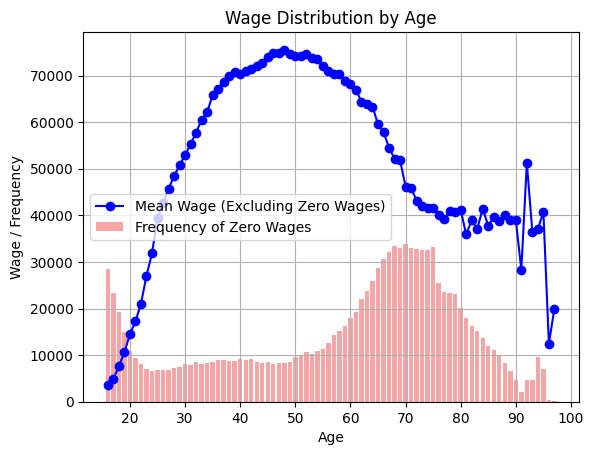

In [21]:
wage_zero_data = wage_data[wage_data['INCWAGE'] == 0].groupby('AGE')['INCWAGE'].count()

mean_wage_by_age = wage_data[wage_data['INCWAGE'] > 0].groupby('AGE')['INCWAGE'].mean()


plt.bar(wage_zero_data.index, wage_zero_data.values, color='lightcoral', alpha=0.7, label='Frequency of Zero Wages')

plt.plot(mean_wage_by_age.index, mean_wage_by_age.values, color='blue', marker='o', label='Mean Wage (Excluding Zero Wages)')

plt.title('Wage Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Wage / Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Education data Grouping

In [25]:
wage_data["EDUC_GROUPED"].unique()

array(['7', '6', '2', '0', '4', '5', '3', '10', '8', '11', '1'],
      dtype=object)

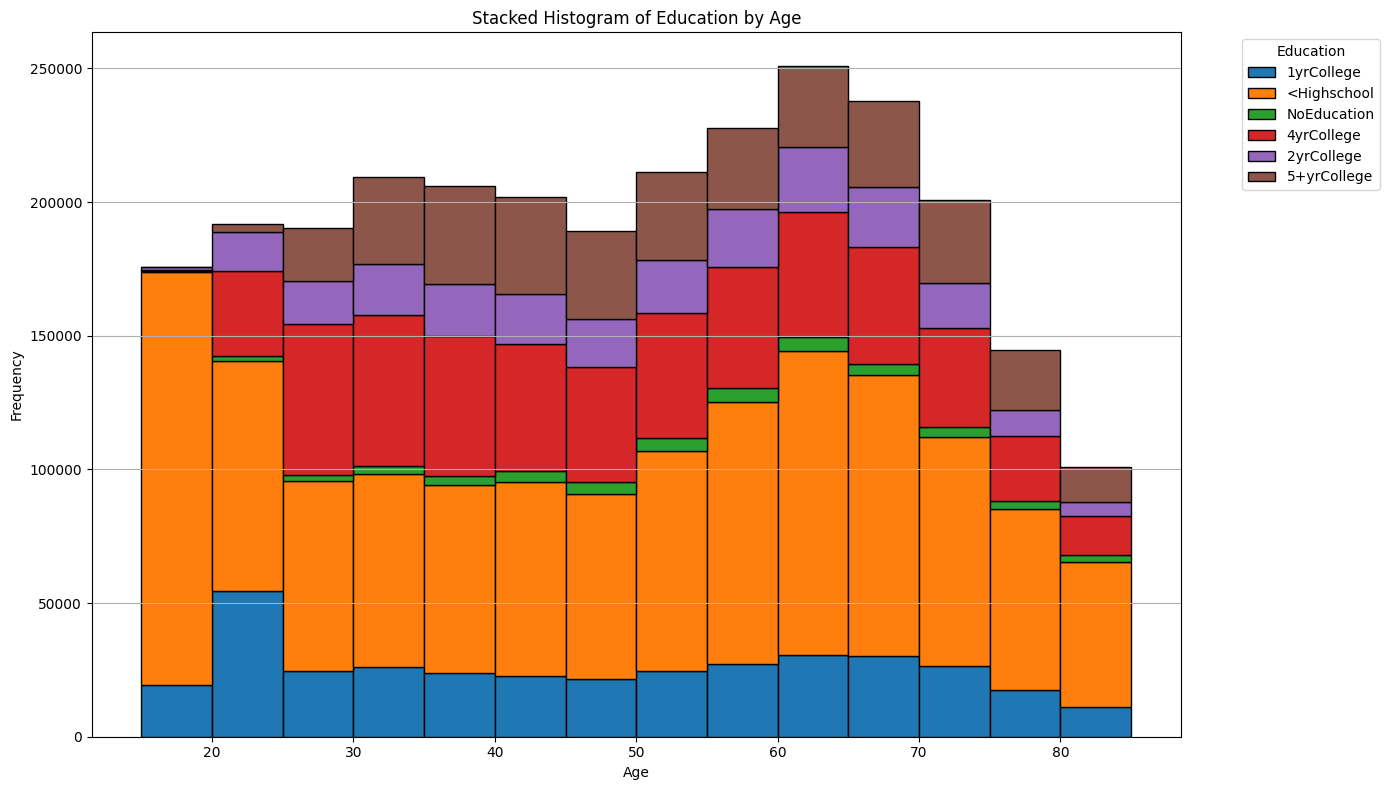

In [30]:
# group highschool and under in one
wage_data['EDUC'] = wage_data['EDUC'].astype(str)

wage_data['EDUC_GROUPED'] = wage_data['EDUC'].replace({
    '0': 'NoEducation','1': '<Highschool', '2': '<Highschool', '3': '<Highschool',
      '4': '<Highschool', '5': '<Highschool', '6': '<Highschool',
      '7': '1yrCollege', '8': '2yrCollege', '9': '3yrCollege',
      '10': '4yrCollege', '11': '5+yrCollege'
})
# 07	1 year of college	X
# 08	2 years of college	X
# 09	3 years of college	·
# 10	4 years of college	X
# 11	5+ years of college	X

plt.figure(figsize=(14, 8))

# Get the unique degree fields
edu = wage_data['EDUC_GROUPED'].unique()

# Plot stacked histogram
plt.hist([wage_data[wage_data['EDUC_GROUPED'] == field]['AGE'] for field in edu],
         bins=range(15, 90, 5), stacked=True, label=edu, edgecolor='black')

# Add titles and labels
plt.title('Stacked Histogram of Education by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

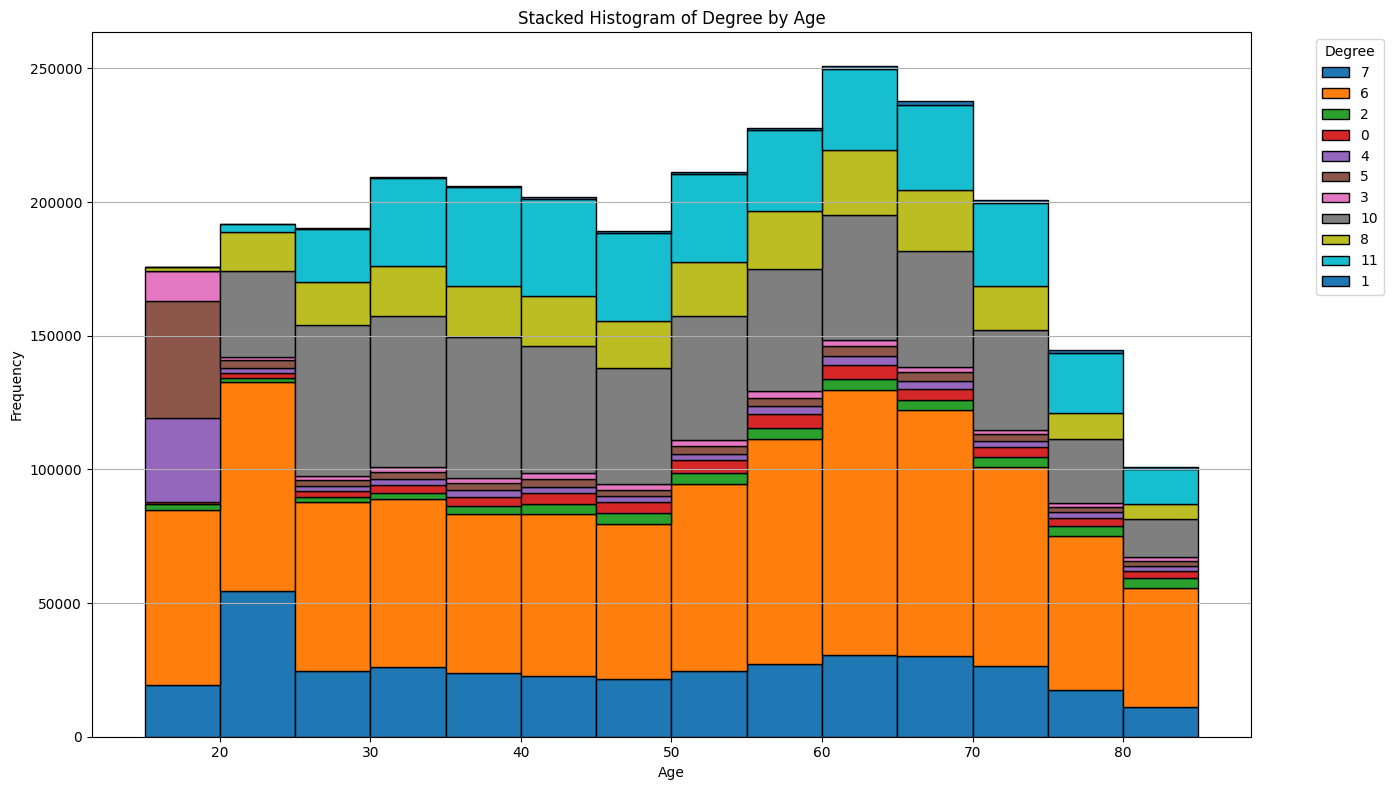

In [15]:

data = wage_data[wage_data['EDUC_GROUPED'] != '99']

# Step 2: Define a mapping for 'degcode' labels
data['EDUC_GROUPED'] = data['EDUC_GROUPED'].astype(str)
data['AGE'] = data['AGE'].astype(int)

# Step 3: Plot a stacked histogram of 'DEGFIELD' frequencies by 'AGE'
plt.figure(figsize=(14, 8))

# Get the unique degree fields
degree_fields = data['EDUC_GROUPED'].unique()

# Plot stacked histogram
plt.hist([data[data['EDUC_GROUPED'] == field]['AGE'] for field in degree_fields],
         bins=range(15, 90, 5), stacked=True, label=degree_fields, edgecolor='black')

# Add titles and labels
plt.title('Stacked Histogram of Degree by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Degree', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
group_mapping = {
    0: [0, 40],  # General and Undefined
    1: [11, 13, 21, 24, 25, 36, 37, 50, 51],  # STEM
    2: [15, 33, 34, 48, 49, 54, 55, 60, 64],  # Humanities, Arts, and Social Sciences
    3: [19, 20, 32, 62],  # Business, Law, and Communication
    4: [22, 23, 35, 41, 56, 57, 58, 59, 61, 38, 53],  # Vocational, Health, and Education
}

# Create a reverse mapping for quick lookup
group_reverse_mapping = {field: group for group, fields in group_mapping.items() for field in fields}

# Map the DEGFIELD column to its corresponding group
wage_data['DEGGROUP'] = wage_data['DEGFIELD'].map(group_reverse_mapping)
wage_data.drop(columns=['DEGFIELD'])


,SEX,AGE,RACE,HCOVANY,EDUC,EMPSTAT,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME,DEGGROUP
0,2,85,8,2,7,3,0,0,0,0,0,0.0
1,1,51,1,2,6,3,12500,0,0,0,0,0.0
2,2,36,2,2,2,3,16400,0,0,0,0,0.0
3,1,74,2,2,0,3,0,0,0,0,0,0.0
4,1,49,1,1,7,3,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2809385,1,55,1,2,6,1,21800,0,0,56,13,0.0
2809386,1,33,1,2,10,1,52000,0,0,56,10,1.0
2809387,2,27,1,2,10,1,43000,0,0,56,45,4.0
2809388,1,66,1,2,6,1,162000,0,0,56,10,0.0


In [8]:
continuous_vars = ['AGE', 'TRANTIME']
categorical_vars = ['SEX', 'RACE', 'HCOVANY', 'EDUC', 'DEGGROUP', 'EMPSTAT', 
                    'INCWELFR', 'INCINVST', 'PWSTATE2']

## Train test split
We proceed to split the training set 

In [10]:
data = pd.get_dummies(wage_data, columns=categorical_vars, drop_first=True)



In [11]:

X = data.drop(columns=['INCWAGE'])
y = data['INCWAGE']

X = sm.add_constant(X)
# train text split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

: 

In [12]:
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred = model.predict(X_test)